<a href="https://www.kaggle.com/code/akankshavarshney2105/evaluation?scriptVersionId=203023511" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = 'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'
file_name = 'bank+marketing.zip'
!wget $data -O $file_name



--2024-10-24 08:31:55--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: 'bank+marketing.zip'

bank+marketing.zip      [    <=>             ] 999.85K  1.08MB/s    in 0.9s    

2024-10-24 08:32:03 (1.08 MB/s) - 'bank+marketing.zip' saved [1023843]



In [3]:
import os
print(os.getcwd()) 

/kaggle/working


In [4]:
import os
import zipfile  

# Step 1: Check the current directory and list files
print(os.listdir())  # This shows the files in /kaggle/working

# Step 2: Define the ZIP files
main_zip_file = 'bank+marketing.zip'  # This is the file containing bank.zip
bank_zip_file = 'bank.zip'  # This is the file we want to extract from

# Step 3: Extract bank.zip from bank+marketing.zip
with zipfile.ZipFile(main_zip_file, 'r') as main_zip_ref:
    main_zip_ref.extract(bank_zip_file)  # Extract bank.zip from the main ZIP file

# Step 4: Open the extracted bank.zip file and list its contents
with zipfile.ZipFile(bank_zip_file, 'r') as zip_ref:
    # List all files in the ZIP archive
    zip_contents = zip_ref.namelist()
    print("\nContents of bank.zip:")
    print(zip_contents)  # This will show you the actual paths of the files inside

    # Step 5: Extract the specific CSV file (adjust the path if necessary)
    zip_ref.extract('bank-full.csv')  #

['.virtual_documents', 'bank+marketing.zip']

Contents of bank.zip:
['bank-full.csv', 'bank-names.txt', 'bank.csv']


In [5]:
df = pd.read_csv('bank-full.csv',delimiter= ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
df.y.value_counts()
df.y=(df.y == 'yes').astype(int)
df.y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [7]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [11]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [12]:
df_train=df_train.reset_index(drop = True)
df_val=df_val.reset_index(drop = True)
df_test=df_test.reset_index(drop = True)

y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_val['y']

KeyError: 'y'

In [13]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_val, df_val['balance']))
print(roc_auc_score(y_val, df_val['day']))
print(roc_auc_score(y_val, df_val['duration']))
print(roc_auc_score(y_val, df_val['previous']))

0.5995068851725284
0.46478015736751066
0.7965344730967409
0.607255799705406


In [14]:
y_val.sum()

1098

In [15]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,entrepreneur,married,tertiary,no,40,no,yes,cellular,11,jul,123,2,-1,0,unknown
1,33,technician,married,secondary,no,4790,yes,no,cellular,20,apr,137,1,272,2,failure
2,32,technician,single,tertiary,no,392,yes,no,cellular,21,nov,148,2,-1,0,unknown
3,40,admin.,divorced,secondary,no,2129,no,no,cellular,30,apr,452,1,-1,0,unknown
4,54,unemployed,married,tertiary,no,1180,no,no,cellular,19,nov,394,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,32,technician,single,tertiary,no,195,yes,no,cellular,22,aug,239,2,-1,0,unknown
27122,52,self-employed,married,secondary,no,3720,no,no,cellular,20,nov,114,2,-1,0,unknown
27123,52,blue-collar,married,secondary,no,289,yes,no,unknown,21,may,45,13,-1,0,unknown
27124,32,management,married,tertiary,no,312,no,no,cellular,11,aug,67,4,-1,0,unknown


In [16]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
numeric = list(df.dtypes[df.dtypes == 'int64'].index)
categories = list(df.dtypes[df.dtypes==object].index)
categories,numeric
numeric.remove('y')

In [18]:
from sklearn.feature_extraction import DictVectorizer
dv=DictVectorizer()
train_dict = df_train[categories+numeric].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categories+numeric].to_dict(orient='records')
X_val = dv.fit_transform(val_dict)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)
ypred= model.predict_proba(X_val)[:,1]

In [19]:
(ypred>=0.5).sum()

571

In [20]:
df_val.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [21]:
roc_auc_score(y_val, ypred)

0.9011345584849869

In [22]:
t = np.linspace(0,1,100)
t

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [23]:
predict_positive = (ypred >= 0.5)
predict_positive.sum()

571

In [24]:
actual_positive = (y_val ==1)
actual_negative = (y_val ==0)

predict_positive = (ypred >= 0.5)
predict_negative = (ypred < 0.5)

tn = (actual_negative & predict_negative).sum()
tp = (actual_positive & predict_positive).sum()

fp=(actual_positive & predict_negative).sum()
fn=(actual_negative & predict_positive).sum()
precision = tp/(tp+fn)

In [25]:
y_val

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
tn,tp,fp,fn,precision

(7747, 374, 724, 197, 0.6549912434325744)

In [ ]:
#(actual_negative & predict_negative).isnull()
#(actual_positive & predict_positive).isnull()

#(actual_positive & predict_negative).isnull()
#(actual_negative & predict_positive).sum()

In [28]:
t = np.linspace(0,1,100)
score = []
for i in t :
    actual_positive = (y_val ==1)
    actual_negative = (y_val ==0)

    predict_positive = (ypred >= i)
    predict_negative = (ypred < i)

    tn = (actual_negative & predict_negative).sum()
    tp = (actual_positive & predict_positive).sum()

    fp=(actual_positive & predict_negative).sum()
    fn=(actual_negative & predict_positive).sum()
    precision = tp/(tp+fn)if (tp + fn) > 0 else 0
    recall = tp/(tp+fp)if (tp + fp) > 0 else 0
    score.append((i,precision,recall))

In [29]:
columns = ['threshold','precision','recall']
df_score = pd.DataFrame(score,columns = columns)
df_score['diff']=df_score['recall']-df_score['precision']
p=df_score['precision']
r=df_score['recall']
df_score['F1']= (2*p*r)/(p+r)
df_score.shape

(100, 5)

In [30]:
df_score[df_score['diff']>=0]

,threshold,precision,recall,diff,F1
0,0.000000,0.121433,1.000000,0.878567,0.216568
1,0.010101,0.136801,0.996357,0.859556,0.240572
2,0.020202,0.161471,0.995446,0.833975,0.277870
3,0.030303,0.190009,0.987250,0.797241,0.318683
4,0.040404,0.223362,0.971767,0.748405,0.363234
5,0.050505,0.257565,0.953552,0.695987,0.405578
6,0.060606,0.290020,0.928962,0.638942,0.442037
7,0.070707,0.318240,0.908925,0.590686,0.471422
8,0.080808,0.343584,0.885246,0.541662,0.495034
9,0.090909,0.369472,0.859745,0.490273,0.516835


In [31]:
df_score[df_score['F1']==0.5683760683760685]

,threshold,precision,recall,diff,F1
23,0.232323,0.535427,0.605647,0.07022,0.568376


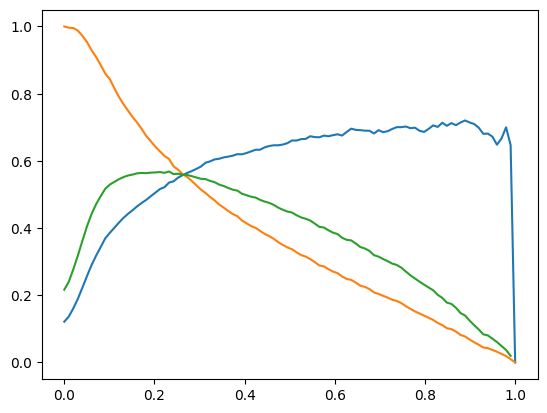

In [32]:
plt.plot(df_score['threshold'],df_score['precision'])
plt.plot(df_score['threshold'],df_score['recall'])
plt.plot(df_score['threshold'],df_score['F1'])

In [58]:
from sklearn.model_selection import KFold
!pip install tqdm

In [54]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categories+numeric].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    return dv,model 
def predict(df, dv, model):
    dicts = df[categories+numeric].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred 

In [55]:
df_full_train.shape

(36168, 17)

In [62]:
n=5 
for C in ([0.000001, 0.001, 1]):
    kfold = KFold(n_splits =n,shuffle = True,random_state = 1)
    scores =[]
    for train_idx,val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        y_train = df_train.y.values
        y_val = df_val.y.values
        #print(y_val.shape)
        dv,model = train(df_train, y_train, C=C)
        y_pred = predict(df_val,dv,model)
        #print(y_pred.shape)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('%s %.3f +- %.3f' % (C,np.mean(scores), np.std(scores)))
        

1e-06 0.824 +- 0.009


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.001 0.883 +- 0.011


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

1 0.901 +- 0.004
